In [1]:
!pip install cylp==0.91.5 git+https://github.com/saezlab/corneto.git@0.9.1-alpha.0

  Cloning https://github.com/saezlab/corneto.git (to revision 0.9.1-alpha.0) to /tmp/pip-req-build-ywvnybpz
  Running command git clone --filter=blob:none --quiet https://github.com/saezlab/corneto.git /tmp/pip-req-build-ywvnybpz
  Running command git checkout -q 6baeec3a41c11bd6821f0d84a365a56b26712f53
  Resolved https://github.com/saezlab/corneto.git to commit 6baeec3a41c11bd6821f0d84a365a56b26712f53
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import pandas as pd
import corneto as cn

cn.info()

CORNETO v0.9.1-alpha.0 (latest: v0.9.1-alpha.1)
Available backends:  CVXPY v1.3.1
Default backend (corneto.K): CVXPY
Available solvers for CVXPY: CBC, ECOS, ECOS_BB, OSQP, SCIPY, SCS
Graphviz available: v0.20.1.
https://github.com/saezlab/corneto


In [3]:
# Load model
df_pkn = pd.read_csv('https://raw.githubusercontent.com/saezlab/CellNOptR/gh-pages/public/PKN-LiverDREAM.sif.txt', sep='\t', header=None)
df_pkn.head()

0  1      2
0    prak  1  hsp27
1  map3k7  1   mkk7
2  map3k7  1    nik
3  map3k7  1   mkk3
4  map3k7  1   mkk6

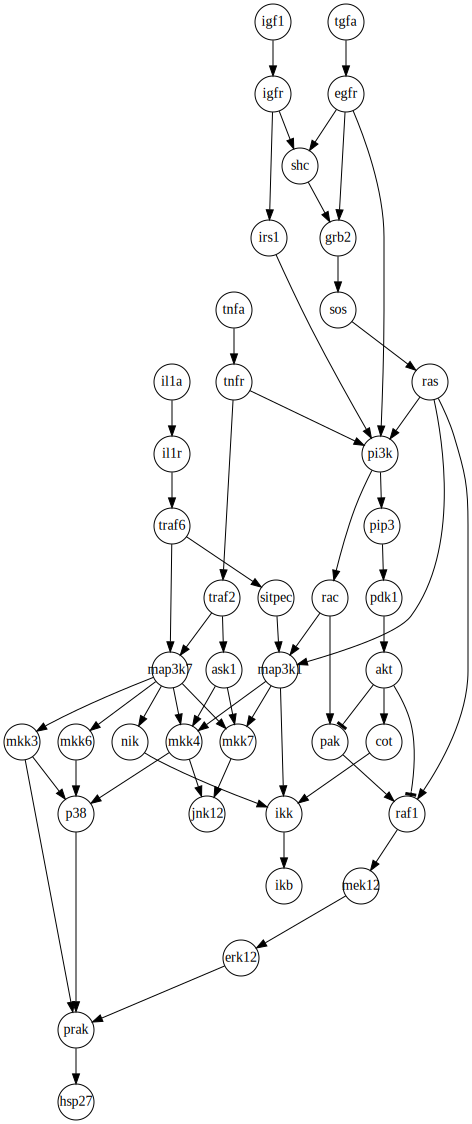

In [4]:
G = cn.Graph.from_sif_tuples([(r[1][0], r[1][1], r[1][2]) for r in df_pkn.iterrows()])
G.plot()

If betaWeight > 0, then the solution will match the shortest signed consistent path. However, betaWeight has to be chosen carefully to avoid having a sub-optimal solution which is shorter at the expenses of non fitting the measurement

In [5]:
P, Gc = cn.methods.carnival.runVanillaCarnival({'igf1': 1}, {'hsp27': 1}, G, betaWeight=1e-3)
P.solve();
P.objectives[0].value

array([0.])

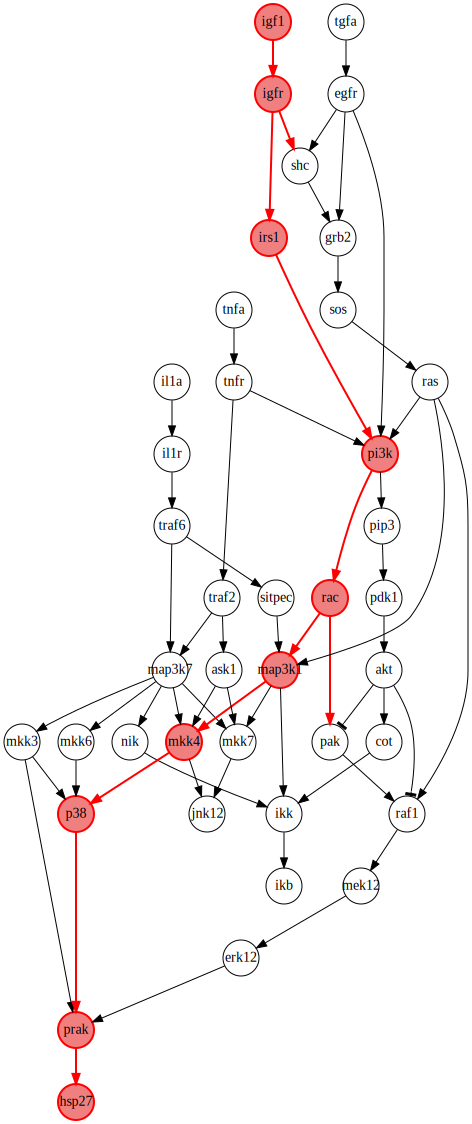

In [6]:
G.to_graphviz(problem=P)

The exact problem can be solved in two steps, but this might not be required. First we run carnival to know the best fitting we can achieve, then we obtain the shortest path only minimizing the length of the path

In [7]:
P, Gc = cn.methods.carnival.runVanillaCarnival({'igf1': 1}, {'hsp27': 1}, G, betaWeight=0)
P.solve()
loss = P.objectives[0].value
print("Loss (error):", loss)

Loss (error): [0.]


In [8]:
# Selected edges
sum(P.symbols['reaction_sends_activation_c0'].value + P.symbols['reaction_sends_inhibition_c0'].value)

14.999999999999998

In [9]:
P, Gc = cn.methods.carnival.runVanillaCarnival({'igf1': 1}, {'hsp27': 1}, G, betaWeight=1) # any weight might work
P += P.objectives[0] <= loss
P.solve();
sum(P.symbols['reaction_sends_activation_c0'].value + P.symbols['reaction_sends_inhibition_c0'].value)

14.999999999999998

In [13]:
?cn.methods.carnival.runVanillaCarnival

Signature:
cn.methods.carnival.runVanillaCarnival(
    perturbations: Dict,
    measurements: Dict,
    priorKnowledgeNetwork: Union[List[Tuple], corneto._core.Graph],
    betaWeight: float = 0.2,
    solver=None,
    **kwargs,
)
Docstring: <no docstring>
File:      ~/anaconda3/envs/spiana/lib/python3.10/site-packages/corneto/methods/carnival.py
Type:      function